In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
Dataframe = pd.read_csv('Data_tiki_general.csv')
columns_to_string = ['name','seller_name','category']
Dataframe[columns_to_string] = Dataframe[columns_to_string].astype(pd.StringDtype)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4056\3566894629.py:3: UserWarning: Instantiating StringDtype without any arguments.Pass a StringDtype instance to silence this warning.
  Dataframe[columns_to_string] = Dataframe[columns_to_string].astype(pd.StringDtype)


In [11]:
pd.options.display.float_format = '{:,.2f}'.format
Dataframe.describe(include='all')

,Unnamed: 0,name,price,original_price,discount,rating,review_count,sales_count,seller_name,category
count,758.00,758,758.00,758.00,758.00,758.00,758.00,758.00,758,758
unique,NaN,747,NaN,NaN,NaN,NaN,NaN,NaN,138,6
top,NaN,"Quạt Tích Điện, Quạt Đứng Thông Minh XIAOMI Sm...",NaN,NaN,NaN,NaN,NaN,NaN,Tiki Trading,Quạt Điện
freq,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,155,184
mean,"1,560.73",NaN,"805,567.16","998,496.33",14.02,4.61,37.83,220.19,NaN,NaN
std,865.97,NaN,"559,770.55","754,715.70",18.84,0.69,194.87,"1,123.73",NaN,NaN
min,0.00,NaN,"189,000.00","189,000.00",0.00,1.00,1.00,1.00,NaN,NaN
25%,853.25,NaN,"350,625.00","420,000.00",0.00,4.50,1.00,5.00,NaN,NaN
50%,"1,487.00",NaN,"600,000.00","755,500.00",0.00,4.80,3.00,15.00,NaN,NaN
75%,"2,380.25",NaN,"1,157,250.00","1,452,250.00",30.00,5.00,12.00,56.75,NaN,NaN


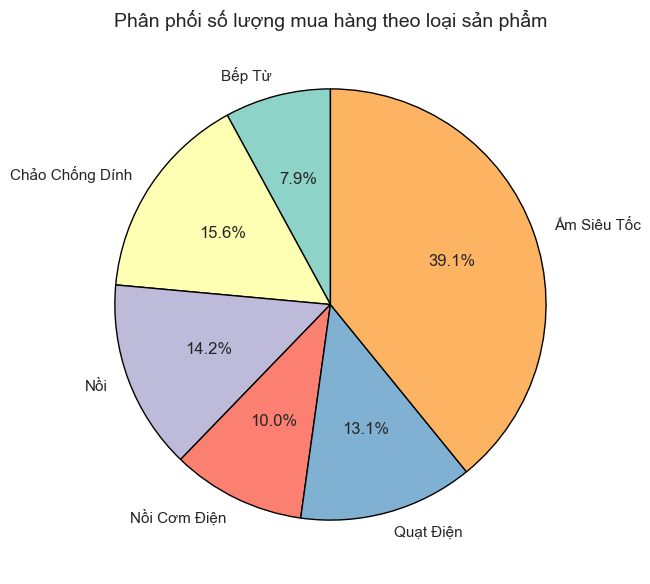

In [18]:
# Khảo sát lượng mua hàng theo từng loại sản phẩm
category_sales = Dataframe.groupby('category')['sales_count'].sum()
plt.figure(figsize=(7,7))
plt.pie(category_sales,
        labels=category_sales.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Set3.colors,
        wedgeprops={'edgecolor': 'black'})
plt.title('Phân phối số lượng mua hàng theo loại sản phẩm', fontsize=14)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4056\1797927363.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_total, x='category', y='revenue', palette='Set1', width=0.6)


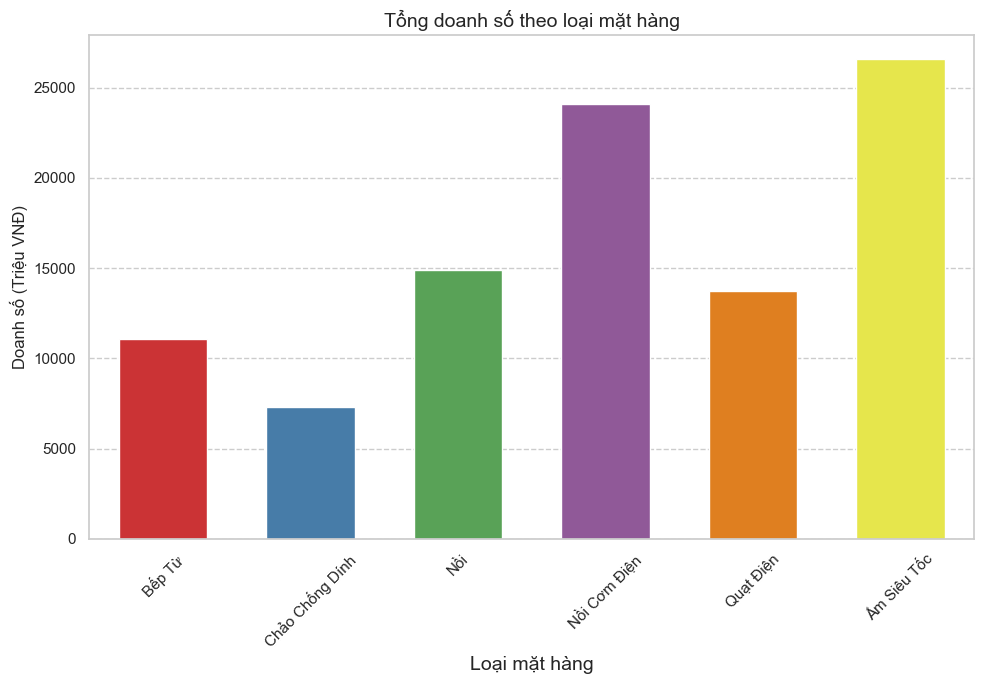

In [31]:
# Khảo sát doanh số theo từng loại mặt hàng
Dataframe['revenue'] = Dataframe['price'] * Dataframe['sales_count']
Dataframe['revenue'] = Dataframe['revenue'] / (10**6)
revenue_total = Dataframe.groupby('category')['revenue'].sum().reset_index()
sns.set(style='whitegrid')
plt.figure(figsize=(10,7))
sns.barplot(data=revenue_total, x='category', y='revenue', palette='Set1', width=0.6)
plt.title('Tổng doanh số theo loại mặt hàng', fontsize = 14)
plt.xlabel('Loại mặt hàng', fontsize = 14)
plt.ylabel('Doanh số (Triệu VNĐ)', fontsize = 12)
plt.xticks(rotation = 45)
plt.grid(axis='y', linestyle = '--', alpha = 1)
plt.tight_layout()
plt.show()

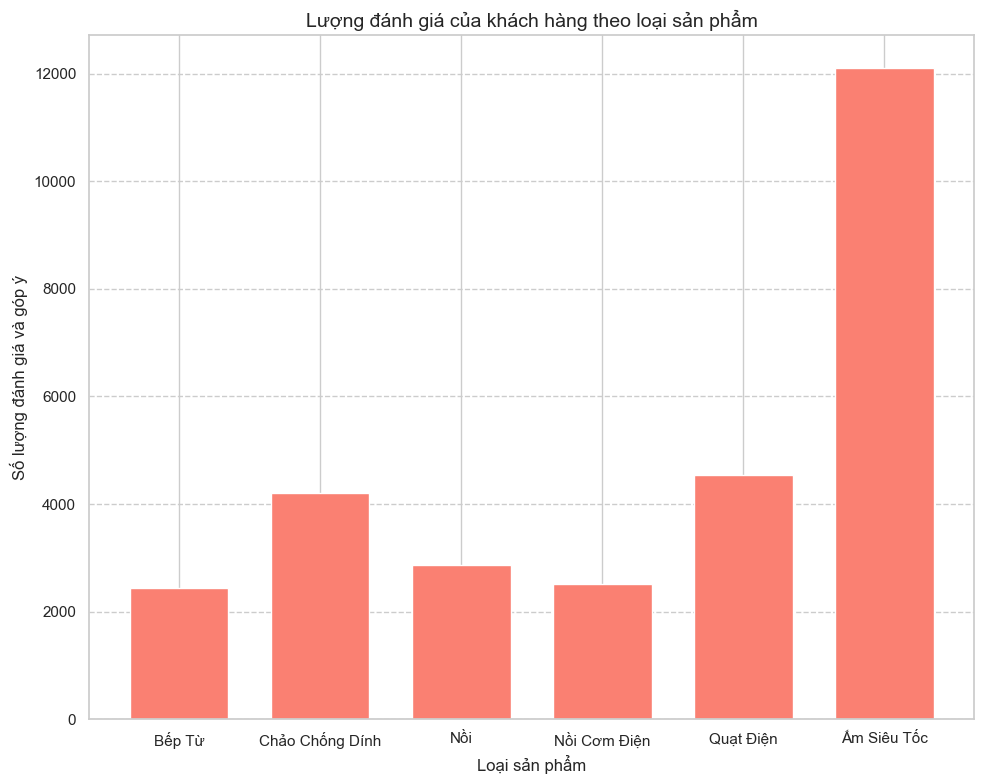

In [38]:
category_reviews = Dataframe.groupby('category')['review_count'].sum().reset_index()
plt.figure(figsize=(10, 8))
plt.bar(category_reviews['category'], category_reviews['review_count'], color = 'salmon', width=0.7)
plt.title("Lượng đánh giá của khách hàng theo loại sản phẩm", fontsize = 14)
plt.xlabel("Loại sản phẩm", fontsize = 12)
plt.ylabel("Số lượng đánh giá và góp ý", fontsize = 12)
plt.grid(axis='y', linestyle = '--', alpha = 1)
plt.tight_layout()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4056\75101186.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_rating, x = 'rating', y = 'category', palette='viridis', alpha = 0.8)


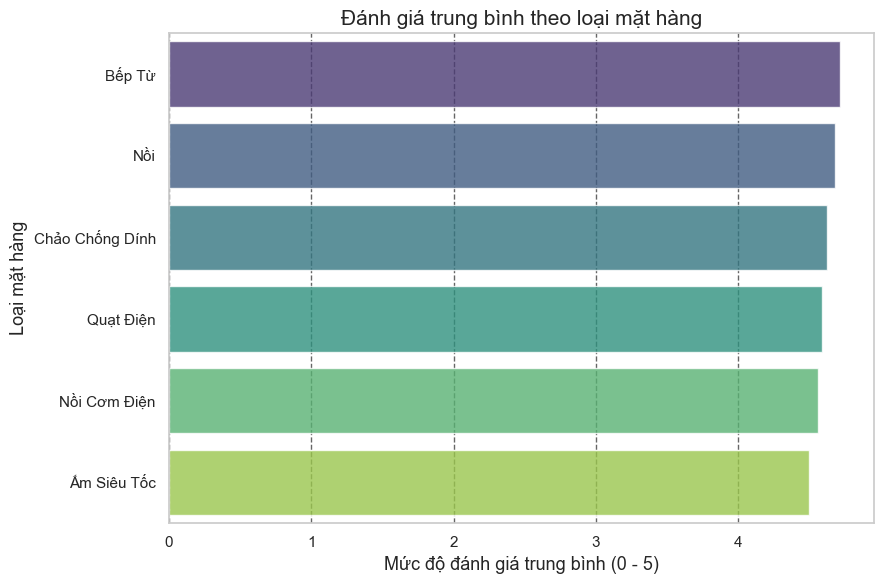

In [47]:
category_rating = Dataframe.groupby('category')['rating'].mean().reset_index()
category_rating = category_rating.sort_values(by='rating', ascending=False)
plt.figure(figsize=(9,6))
sns.barplot(data=category_rating, x = 'rating', y = 'category', palette='viridis', alpha = 0.8)
plt.title('Đánh giá trung bình theo loại mặt hàng', fontsize = 15)
plt.xlabel('Mức độ đánh giá trung bình (0 - 5)', fontsize = 13)
plt.ylabel('Loại mặt hàng', fontsize = 13)
plt.grid(axis='x', linestyle = '--', alpha = 0.6, color = 'black')
plt.tight_layout()
plt.show()

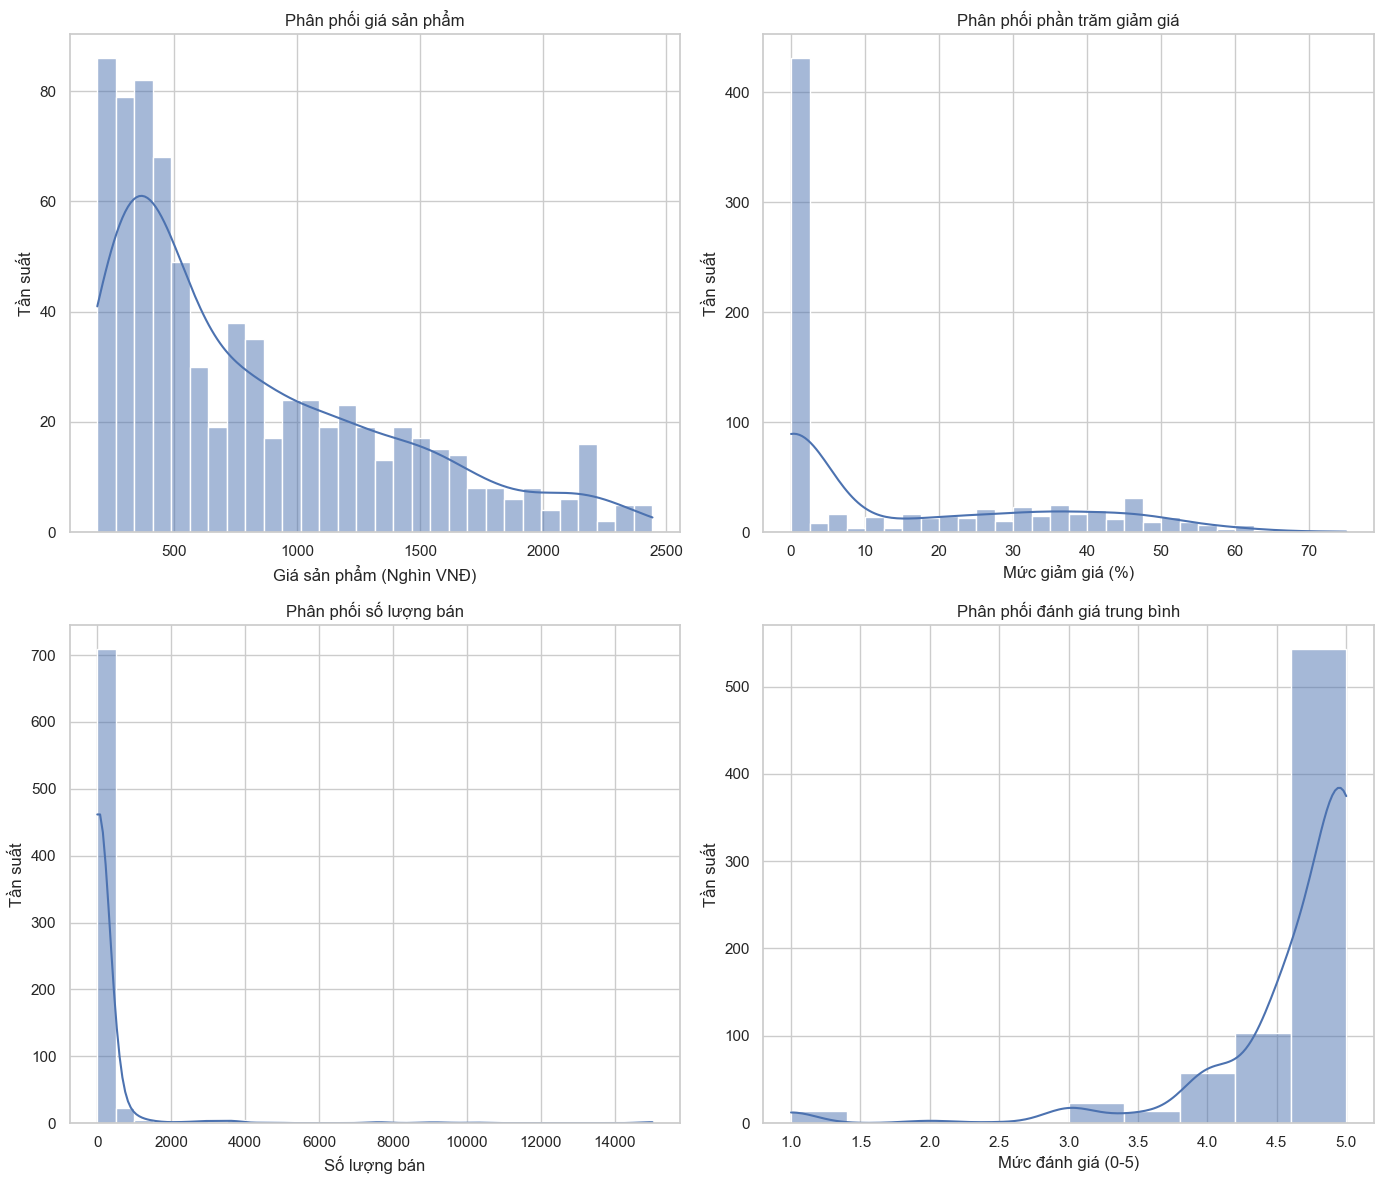

In [15]:
# Trực quan hóa phân phối dữ liệu
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Phân phối giá
sns.histplot(Dataframe['price']/1000, bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Phân phối giá sản phẩm")
axes[0, 0].set_xlabel('Giá sản phẩm (Nghìn VNĐ)')
axes[0, 0].set_ylabel('Tần suất')

# Phân phối giảm giá
sns.histplot(Dataframe['discount'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Phân phối phần trăm giảm giá")
axes[0, 1].set_xlabel('Mức giảm giá (%)')
axes[0, 1].set_ylabel('Tần suất')

# Phân phối số lượng bán
sns.histplot(Dataframe['sales_count'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Phân phối số lượng bán")
axes[1, 0].set_xlabel('Số lượng bán')
axes[1, 0].set_ylabel('Tần suất')

# Phân phối đánh giá
sns.histplot(Dataframe['rating'], bins=10, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Phân phối đánh giá trung bình")
axes[1, 1].set_xlabel('Mức đánh giá (0-5)')
axes[1, 1].set_ylabel('Tần suất')

plt.tight_layout()
plt.show()